In [1]:
# Basic Libraries
%matplotlib inline 
import time
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from urllib.request import urlopen 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from collections import OrderedDict  
data_path = r"C:\Users\jethr\ICPSR_36404-V2\ICPSR_36404\DS0001\36404-0001-Data.tsv"
sb.set() # set the default Seaborn style for graphics

https://www.datacamp.com/community/tutorials/deep-learning-python#preprocess

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b

In [2]:
def build_df(filename):
    df = pd.read_csv(data_path, header=0, sep="\t")
    return df

# Data Preparation/Cleaning

In [3]:
df = build_df(data_path)
print(df.dtypes)

C:\Users\jethr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ABT_INMATE_ID        object
SEX                   int64
ADMTYPE               int64
OFFGENERAL            int64
EDUCATION             int64
ADMITYR               int64
RELEASEYR             int64
MAND_PRISREL_YEAR    object
PROJ_PRISREL_YEAR    object
PARELIG_YEAR         object
SENTLGTH             object
OFFDETAIL             int64
RACE                  int64
AGEADMIT              int64
AGERELEASE           object
TIMESRVD              int64
RELTYPE              object
STATE                 int64
dtype: object


In [4]:
df.replace(" ", np.nan, inplace=True)

In [5]:
df.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
0,A012015000000091071,1,1,2,9,2006,2010,NaN,NaN,NaN,4,10,9,3,3,2,3,1
1,A022015000000096906,1,3,3,9,2008,2008,NaN,NaN,NaN,0,12,1,3,3,0,NaN,2
2,A042015000000118649,1,1,1,9,2013,2014,2014,2014,NaN,0,6,1,1,1,0,1,4
3,A062015000000167469,1,2,2,9,1996,1996,NaN,NaN,NaN,2,7,1,2,2,0,1,6
4,A132015000000550479,1,1,1,9,1968,1972,1978,NaN,NaN,3,4,1,1,1,2,1,13


In [6]:
#df = df.convert_objects(convert_numeric=True)
#df.head()

In [6]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10907333, 18)


ABT_INMATE_ID              0
SEX                        0
ADMTYPE                    0
OFFGENERAL                 0
EDUCATION                  0
ADMITYR                    0
RELEASEYR                  0
MAND_PRISREL_YEAR    7209317
PROJ_PRISREL_YEAR    4662333
PARELIG_YEAR         8148769
SENTLGTH               20063
OFFDETAIL                  0
RACE                       0
AGEADMIT                   0
AGERELEASE           1200886
TIMESRVD                   0
RELTYPE              1809372
STATE                      0
dtype: int64


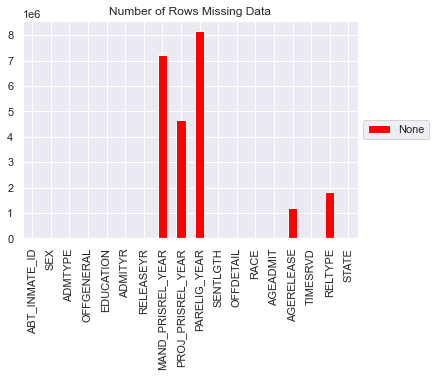

In [8]:
missing_data = df.isnull().sum()
print(missing_data)
missing_data.plot(kind='bar', color='Red', title="Number of Rows Missing Data", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

As we can see from the above graph, most of the missing data are related to the year when the prisoner is going to be released. For example, some columns such as PARELIG_YEAR are missing almost 80% of their values. Therefore, we cannot impute the values in these columns as more data is missing than available. It is best that we drop all missing values. 

In [9]:
complete_rows = df.dropna()

In [10]:
complete_rows.head()


,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Convert relevant data types from object to integer

In [11]:
complete_rows['MAND_PRISREL_YEAR'] = complete_rows['MAND_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PROJ_PRISREL_YEAR'] = complete_rows['PROJ_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PARELIG_YEAR'] = complete_rows['PARELIG_YEAR'].astype(str).astype(int)
complete_rows['AGERELEASE'] = complete_rows['AGERELEASE'].astype(str).astype(int)
complete_rows['RELTYPE'] = complete_rows['RELTYPE'].astype(str).astype(int)
complete_rows['SENTLGTH'] = complete_rows['SENTLGTH'].astype(str).astype(int)

<ipython-input-11-cf14f2ca324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['MAND_PRISREL_YEAR'] = complete_rows['MAND_PRISREL_YEAR'].astype(str).astype(int)
<ipython-input-11-cf14f2ca324f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['PROJ_PRISREL_YEAR'] = complete_rows['PROJ_PRISREL_YEAR'].astype(str).astype(int)
<ipython-input-11-cf14f2ca324f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Convert relevant data types from object to categorical

In [12]:
complete_rows['SEX'] = complete_rows['SEX'].astype("category")
complete_rows['ADMTYPE'] = complete_rows['ADMTYPE'].astype("category")
complete_rows['OFFGENERAL'] = complete_rows['OFFGENERAL'].astype("category")
complete_rows['EDUCATION'] = complete_rows['EDUCATION'].astype("category")
complete_rows['SENTLGTH'] = complete_rows['SENTLGTH'].astype("category")
complete_rows['OFFDETAIL'] = complete_rows['OFFDETAIL'].astype("category")
complete_rows['RACE'] = complete_rows['RACE'].astype("category")
complete_rows['AGEADMIT'] = complete_rows['AGEADMIT'].astype("category")
complete_rows['AGERELEASE'] = complete_rows['AGERELEASE'].astype("category")
complete_rows['TIMESRVD'] = complete_rows['TIMESRVD'].astype("category")
complete_rows['RELTYPE'] = complete_rows['RELTYPE'].astype("category")
complete_rows['STATE'] = complete_rows['STATE'].astype("category")

<ipython-input-12-30e05d9d4249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['SEX'] = complete_rows['SEX'].astype("category")
<ipython-input-12-30e05d9d4249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['ADMTYPE'] = complete_rows['ADMTYPE'].astype("category")
<ipython-input-12-30e05d9d4249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [13]:
print(complete_rows.dtypes)

ABT_INMATE_ID          object
SEX                  category
ADMTYPE              category
OFFGENERAL           category
EDUCATION            category
ADMITYR                 int64
RELEASEYR               int64
MAND_PRISREL_YEAR       int32
PROJ_PRISREL_YEAR       int32
PARELIG_YEAR            int32
SENTLGTH             category
OFFDETAIL            category
RACE                 category
AGEADMIT             category
AGERELEASE           category
TIMESRVD             category
RELTYPE              category
STATE                category
dtype: object


In [14]:
print(len(complete_rows))

720189


As can be seen, eventhough we have dropped more than 90% of the data, we are still left with 720K rows which is more than enough to work with. 

In [15]:
complete_rows.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Since the data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value. Thus, we iterate through the dataset to find deuplicate copies of Abt_Inmate_ID value which indicates that the felony has recommited a crime. We will mark 0 as non-repeated offender and 1 as repeated offender. 

In [16]:
repeat = complete_rows.set_index('ABT_INMATE_ID').index.duplicated(keep=False) #If the index is duplicated, TRUE, else FALSE
repeat = repeat * 1 #Change true and false to 1 and 0.


In [17]:
recividism = [x + 0 for x in repeat] #add 1 to all the numbers in repeat.
se = pd.Series(recividism)
complete_rows.insert(0, 'recidivism', se.values) #insert this row inside
#it will be binary from now on

In [18]:
complete_rows.head()

,recidivism,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


We will proceed to drop 'ABT_INMATE_ID' as it will not be used for our machine learning model.

In [19]:
complete_rows.drop('ABT_INMATE_ID', axis=1, inplace = True)
complete_rows['recidivism'] = complete_rows['recidivism'].astype("category")

C:\Users\jethr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now I remove all the rows that have "missing"

In [21]:
complete_rows = complete_rows[complete_rows.RELEASEYR != 9999]
complete_rows = complete_rows[complete_rows.ADMTYPE != 9]
complete_rows = complete_rows[complete_rows.OFFGENERAL != 9]
complete_rows = complete_rows[complete_rows.ADMITYR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 99]
complete_rows = complete_rows[complete_rows.RACE != 9]
complete_rows = complete_rows[complete_rows.AGEADMIT != 9]
complete_rows.drop('EDUCATION', axis=1, inplace=True) # missing all values
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9993]
complete_rows = complete_rows[complete_rows.PROJ_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.PARELIG_YEAR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 9]
complete_rows = complete_rows[complete_rows.SENTLGTH != 9]
complete_rows = complete_rows[complete_rows.AGERELEASE != 9]
complete_rows = complete_rows[complete_rows.RELTYPE != 9]

I created complete_rows2 as random forest and Decision Tree do not require standardScaling of continuous variables. 

In [22]:
complete_rows.head()
complete_rows2 = complete_rows.copy()

Applying StandardScaler for continuous variables (only applicable to neural network dataset)

In [23]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
columns = ['ADMITYR', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PROJ_PRISREL_YEAR', 'PARELIG_YEAR']
for i in columns:
    # load data
    data = complete_rows[i].values.reshape(-1,1)
    # create scaler
    scaler = StandardScaler()
    # fit and transform in one step
    complete_rows[i] = scaler.fit_transform(data)

In [24]:
complete_rows.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,0.281023,0.018399,-0.046774,-0.097914,0.015980,2,12,1,2,2,0,1,18
23,1,1,1,3,0.071847,-0.270770,-0.099855,-0.159550,-0.050625,1,12,2,4,4,1,2,44
287979,0,1,1,2,1.117729,1.175077,0.032847,0.148631,0.149188,3,10,1,5,5,1,1,4
404424,0,1,1,1,1.117729,1.464246,0.059387,0.210267,0.182490,3,1,1,4,4,1,1,4
488157,0,1,2,1,1.117729,1.175077,0.032847,0.148631,0.082584,4,3,1,5,5,0,1,4
491650,0,1,1,1,1.117729,1.464246,0.032847,0.148631,0.149188,3,3,1,3,3,1,1,4
743263,0,1,2,2,-1.392387,-2.294955,0.245169,-0.529367,0.382303,2,7,3,2,2,1,1,6
2086862,0,2,2,1,0.490200,0.018399,-0.073314,-0.406095,-0.117229,2,5,2,4,4,0,2,6
2942323,0,2,2,2,0.699376,0.596738,-0.020234,-0.221186,0.215792,2,11,1,3,3,0,1,6
3075560,0,1,1,1,1.326905,1.464246,0.085927,0.271903,0.182490,2,6,3,2,2,0,1,8


In [25]:
complete_rows2.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,1,1,3,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,1,1,2,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,1,1,1,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,1,2,1,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4
491650,0,1,1,1,2012,2014,2013,2013,2013,3,3,1,3,3,1,1,4
743263,0,1,2,2,2000,2001,2021,2002,2020,2,7,3,2,2,1,1,6
2086862,0,2,2,1,2009,2009,2009,2004,2005,2,5,2,4,4,0,2,6
2942323,0,2,2,2,2010,2011,2011,2007,2015,2,11,1,3,3,0,1,6
3075560,0,1,1,1,2013,2014,2015,2015,2014,2,6,3,2,2,0,1,8


Checking of class imbalance in dataset to see if under/oversampling of dataset is required

In [26]:
#to check for class imbalance in data set
def print_data_perc(data_frame, col):
    """Function used to print class distribution"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [27]:
print_data_perc(complete_rows, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


In [28]:
print_data_perc(complete_rows2, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


# Train-test split for Neural Network, Random Forest and Decision Tree

X1,y1 are the datasets for neural network. X2,y2 are datasets for Random Forest and Decision Tree

In [29]:
X1 = complete_rows.iloc[:, 1:17]
y1 = complete_rows.iloc[:, 0:1]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [31]:
X2 = complete_rows2.iloc[:, 1:17]
y2 = complete_rows2.iloc[:, 0:1]

In [32]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [33]:
print('Train1', X_train.shape, y_train.shape)
print('Test1', X_test.shape, y_test.shape)
print('Train2', X_train2.shape, y_train2.shape)
print('Test2', X_test2.shape, y_test2.shape)

Train1 (462720, 16) (462720, 1)
Test1 (198309, 16) (198309, 1)
Train2 (462720, 16) (462720, 1)
Test2 (198309, 16) (198309, 1)


# Training Neural Network Model

Sigmoid and tanh should not be used as activation function for the hidden layer. This is because of the vanishing gradient problem, i.e., if your input is on a higher side (where sigmoid goes flat) then the gradient will be near zero. This will cause very slow or no learning during backpropagation as weights will be updated with really small values.

Detailed explanation here: http://cs231n.github.io/neural-networks-1/#actfun

The best function for hidden layers is thus ReLu.

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=However%2C%20neural%20networks%20with%20two,more%20than%20one%20hidden%20layer.

In [34]:
import keras
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer of one-dimensional array with 16 elements for input.(Thus no need to flattenlayer) It would produce 17 outputs in return
model.add(Dense(15, activation='relu', input_shape=(16,)))

#Adding another hidden layer
model.add(Dense(15, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


In [35]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                255       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


[array([[-0.2186586 ,  0.35513806,  0.00496298, -0.00116113,  0.05735415,
          0.20402181,  0.25006658,  0.09821099, -0.37063378,  0.18102902,
          0.3451761 , -0.01311097, -0.31107283, -0.35037214,  0.41158313],
        [ 0.3506471 ,  0.30627632, -0.35751498,  0.04330182, -0.10499436,
         -0.22535941,  0.29160702, -0.2698148 , -0.11350566, -0.08031747,
          0.43991745,  0.00129268,  0.01901627,  0.05360383,  0.19328684],
        [ 0.28616393, -0.31721532,  0.04821077,  0.4008667 ,  0.31757718,
         -0.38745242, -0.22978902, -0.10865366, -0.41072   , -0.3432525 ,
          0.40961677, -0.05733454, -0.12943503,  0.10707116,  0.26566422],
        [ 0.13885278,  0.14245743, -0.18787321,  0.04673874, -0.41588983,
          0.316231  , -0.34919056,  0.13625193,  0.39271098,  0.00582707,
          0.43377948, -0.19085431, -0.05878037,  0.33528948, -0.19605865],
        [ 0.25205016, -0.3227447 , -0.16584376, -0.28376132, -0.04935262,
         -0.21950674,  0.3872524 ,

We used binary_crossentropy because our target variable y is a binary variable

In [36]:
# An epoch is a single pass through the entire training set, followed by testing of the verification set. 
#The batch size that you specify in the code above defines the number of samples that going to be propagated through the network. 
#Also, by doing this, you optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   


In [37]:
#https://datascience.stackexchange.com/questions/38955/how-does-the-validation-split-parameter-of-keras-fit-function-work

tensorboard --logdir ./Graph
http://localhost:6006

In [38]:
#It is the parameter specifying how big chunk of training data will be used for validation. It’s a float value between 0 and 1. Validation data is not used for the training, but to evaluate the loss and the accuracy.

#For example: validation_split=0.3 will cause that 30% of the training data will be used for validation
model.fit(X_train, y_train,epochs=20, batch_size=64, verbose=1, callbacks=[keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)])

Epoch 1/20
7230/7230 [==============================] - 7s 877us/step - loss: 0.6534 - accuracy: 0.6195
Epoch 2/20
7230/7230 [==============================] - 6s 857us/step - loss: 0.6025 - accuracy: 0.6652
Epoch 3/20
7230/7230 [==============================] - 6s 865us/step - loss: 0.5656 - accuracy: 0.7020
Epoch 4/20
7230/7230 [==============================] - 6s 879us/step - loss: 0.5424 - accuracy: 0.7248
Epoch 5/20
7230/7230 [==============================] - 6s 867us/step - loss: 0.5297 - accuracy: 0.7305
Epoch 6/20
7230/7230 [==============================] - 6s 815us/step - loss: 0.5176 - accuracy: 0.7388
Epoch 7/20
7230/7230 [==============================] - 6s 836us/step - loss: 0.5075 - accuracy: 0.7434
Epoch 8/20
7230/7230 [==============================] - 6s 835us/step - loss: 0.5011 - accuracy: 0.74600s - loss: 0.5011 - ac
Epoch 9/20
7230/7230 [==============================] - 6s 837us/step - loss: 0.4969 - accuracy: 0.7481
Epoch 10/20
7230/7230 [===================

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, filename= "nn1.gv", title="My first neural network")

Customizing Score for NN

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
def my_custom_loss_func(y_test, y_pred):
    rounded = [round(x[0]) for x in y_pred]
    return accuracy_score(y_test, rounded)

In [51]:
my_custom_loss_func(y_test, model.predict(X_test))

0.7596276517959346

In [52]:
from sklearn.metrics import make_scorer
score = make_scorer(my_custom_loss_func, greater_is_better=False)

# Using Permutation Importance for feature selection for NN (Not sure if this is recommended)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring = score, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(model, scoring = 'r2', random_state=1).fit(X_train, y_train)
# eli5.show_weights(perm, feature_names = X_train.columns.tolist())

# NN model test results

In [39]:
y_pred = model.predict(X_test)
y_pred

array([[0.4774656 ],
       [0.09636477],
       [0.971063  ],
       ...,
       [0.00246406],
       [0.70421135],
       [0.8981146 ]], dtype=float32)

In [40]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

6198/6198 [==============================] - 4s 649us/step - loss: 0.4830 - accuracy: 0.7566
[0.48303136229515076, 0.7566424012184143]


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
rounded = [round(x[0]) for x in y_pred]
# Confusion matrix
confusion_matrix(y_test, rounded)

array([[96382, 11525],
       [36735, 53667]], dtype=int64)

In [42]:
# Accuracy 
print("Accuracy: ", accuracy_score(y_test, rounded))
print("Precision: ", precision_score(y_test, rounded))
print("Recall: ", recall_score(y_test, rounded))
print("F1 score: ", f1_score(y_test, rounded))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test, rounded))

Accuracy:  0.7566424115899933
Precision:  0.8232145048472205
Recall:  0.5936483706112696
F1 score:  0.6898337982184402
Cohen Kappa Score:  0.49811029485867675


# Training Random Forest Classifier Model

In [44]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, oob_score=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train2,y_train2)



<ipython-input-44-6bab64811ae4>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train2,y_train2)


RandomForestClassifier(n_estimators=500, oob_score=True)

# Feature Selection for Random Forest Classifier Model

Using 'feature_importances'

In [45]:
feat_labels = ['SEX','ADMTYPE','OFFGENERAL','ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','SENTLGTH','OFFDETAIL','RACE','AGEADMIT','AGERELEASE','TIMESRVD','RELTYPE','STATE']
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('SEX', 0.014478559943283833)
('ADMTYPE', 0.03955091028693849)
('OFFGENERAL', 0.0339124938846298)
('ADMITYR', 0.08903662548670026)
('RELEASEYR', 0.06990081929813141)
('MAND_PRISREL_YEAR', 0.08200835590488123)
('PROJ_PRISREL_YEAR', 0.06873896721787207)
('PARELIG_YEAR', 0.13580035647445943)
('SENTLGTH', 0.045575993756498366)
('OFFDETAIL', 0.07154332806340437)
('RACE', 0.04517759960695708)
('AGEADMIT', 0.04272676654317511)
('AGERELEASE', 0.04374962385377173)
('TIMESRVD', 0.07033561702697692)
('RELTYPE', 0.021061024647149377)
('STATE', 0.12640295800517057)


Using sklearn SelectfromModel for feature selection

In [46]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf)

# Train the selector
sfm.fit(X_train2, y_train2.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 oob_score=True))

In [47]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

ADMITYR
RELEASEYR
MAND_PRISREL_YEAR
PROJ_PRISREL_YEAR
PARELIG_YEAR
OFFDETAIL
TIMESRVD
STATE


In [48]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train2)
X_important_test = sfm.transform(X_test2)

In [49]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, oob_score=True)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

<ipython-input-49-56fba80e5bf6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_important.fit(X_important_train, y_train)


RandomForestClassifier(n_estimators=500, oob_score=True)

# Random Forest Classifier Model results

In [54]:
y_pred2=clf.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision score: ", precision_score(y_test2, y_pred2))
print("Recall score: ", recall_score(y_test2, y_pred2))

Accuracy: 0.7662133337367442
Precision score:  0.7614705044172129
Recall score:  0.709364837061127


In [55]:
confusion_matrix(y_test2, y_pred2)

array([[87819, 20088],
       [26274, 64128]], dtype=int64)

In [56]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (8 Features) Model
print("Accuracy:", accuracy_score(y_test2, y_important_pred))
print("Precision score: ", precision_score(y_test2, y_important_pred))
print("Recall score: ", recall_score(y_test2, y_important_pred))

Accuracy: 0.7467991871271601
Precision score:  0.7448877623144605
Recall score:  0.6761354837282361


In [57]:
confusion_matrix(y_test2, y_important_pred)

array([[86973, 20934],
       [29278, 61124]], dtype=int64)

In [ ]:
print(clf.score(X_train2, y_train2))

As can be seen, accuracy for model after feature selection has slightly deproved.

In [ ]:
print(clf.oob_score_)

In [ ]:
print(clf.score(X_test2,y_test2))

In [ ]:
from rfpimp import *
imp = importances(model, X_test2, y_test2) # permutation
viz = plot_importances(imp)
viz.view()

# Training Decision Tree Classifier Model (Not going to be included)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_dtc))

# Finding the optimized max_depth

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train2,y_train2)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

As seen above in the graph, max_depth 7 is the most optimum (intersect)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 7)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_dtc))

Visualization of pruned decision tree using sklearn graphviz

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat_labels,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())

# Feature Selection for Decision Tree Model

SelectfromModel used for decision tree classfication

In [ ]:
sfm = SelectFromModel(clf)

# Train the selector
sfm.fit(X_train2, y_train2.values.ravel())

In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Using features selected from Random Forrest and Decision Tree on NN

Using features selected from random forest model above

In [44]:
X3 = complete_rows[['ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','OFFDETAIL','TIMESRVD','STATE']]
y3 = complete_rows.iloc[:, 0:1]
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [45]:
# Initialize the constructor
model2 = Sequential()

# Add an input layer of one-dimensional array with 8 elements for input. (Thus no need to flattenlayer) It would produce 32 outputs in return
model2.add(Dense(7, activation='relu', input_shape=(8,)))

# # model.add(Flatten)

# # Add one hidden layer 
model2.add(Dense(7, activation='relu'))

# model2.add(Dense(128, activation='relu'))

# model2.add(Dense(256, activation='relu'))

# Add an output layer 
model2.add(Dense(1, activation='sigmoid')) 

In [46]:
# Model output shape
model2.output_shape

# Model summary
model2.summary()

# Model config
model2.get_config()

# List all weight tensors 
model2.get_weights()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 63        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


[array([[-0.10863483,  0.56163234, -0.55499107, -0.17730406,  0.00082058,
          0.42029887, -0.32411146],
        [-0.27738312,  0.36895376,  0.6141152 ,  0.06015027,  0.25840884,
          0.04869813,  0.14064449],
        [ 0.19043797,  0.08721691, -0.2555291 , -0.27869272,  0.06503552,
         -0.15546769, -0.09265679],
        [ 0.2639724 , -0.35665283, -0.4741883 , -0.09771848,  0.55489784,
          0.5920133 , -0.4476304 ],
        [-0.01158768, -0.5898957 ,  0.59468824,  0.39791328,  0.35825527,
          0.40594822, -0.05185127],
        [ 0.29552037,  0.55482596,  0.6001896 , -0.1680949 , -0.07977498,
          0.37001985, -0.01830143],
        [ 0.03481859, -0.23959672,  0.08622211,  0.12131739, -0.41073066,
          0.22608316, -0.42611748],
        [ 0.51219696, -0.32502526, -0.3571233 ,  0.03838426,  0.38066643,
         -0.1734395 ,  0.6315296 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.579991  ,  0.11751866,  0.4792403 ,  0

In [47]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model2.fit(X_train3, y_train3, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
7230/7230 [==============================] - 6s 767us/step - loss: 0.7105 - accuracy: 0.6040
Epoch 2/20
7230/7230 [==============================] - 6s 787us/step - loss: 0.6246 - accuracy: 0.6328
Epoch 3/20
7230/7230 [==============================] - 6s 786us/step - loss: 0.6026 - accuracy: 0.6643
Epoch 4/20
7230/7230 [==============================] - 6s 818us/step - loss: 0.5800 - accuracy: 0.6949
Epoch 5/20
7230/7230 [==============================] - 7s 912us/step - loss: 0.5723 - accuracy: 0.6987
Epoch 6/20
7230/7230 [==============================] - 7s 1ms/step - loss: 0.5689 - accuracy: 0.7011
Epoch 7/20
7230/7230 [==============================] - 7s 938us/step - loss: 0.5634 - accuracy: 0.7029
Epoch 8/20
7230/7230 [==============================] - 5s 737us/step - loss: 0.5628 - accuracy: 0.7063
Epoch 9/20
7230/7230 [==============================] - 6s 843us/step - loss: 0.5561 - accuracy: 0.7081
Epoch 10/20
7230/7230 [==============================] - 7s 970us/

In [49]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model2, filename= "nn2.gv", title="Neural Network revised")

In [50]:
y_pred3 = model2.predict(X_test3)
y_pred3
rounded2 = [round(x[0]) for x in y_pred3]
# Confusion matrix
confusion_matrix(y_test3, rounded2)

array([[76780, 31127],
       [26009, 64393]], dtype=int64)

In [51]:
# Accuracy 
print("Accuracy: ", accuracy_score(y_test3, rounded2))
print("Precision: ", precision_score(y_test3, rounded2))
print("Recall: ", recall_score(y_test3, rounded2))
print("F1 score: ", f1_score(y_test3, rounded2))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test3, rounded2))

Accuracy:  0.711883979042807
Precision:  0.6741310720268007
Recall:  0.7122961881374306
F1 score:  0.6926883316659673
Cohen Kappa Score:  0.42189746196889955


Using features selected from decision tree model above

In [ ]:
X4 = complete_rows[['ADMITYR','RELEASEYR','PARELIG_YEAR','TIMESRVD','STATE']]
y4 = complete_rows.iloc[:, 0:1]
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [ ]:
# Initialize the constructor
model3 = Sequential()

# Add an input layer of one-dimensional array with 8 elements for input. (Thus no need to flattenlayer) It would produce 32 outputs in return
model3.add(Dense(32, activation='relu', input_shape=(5,)))

# model.add(Flatten)

# Add one hidden layer 
model3.add(Dense(64, activation='relu'))

model3.add(Dense(128, activation='relu'))

model3.add(Dense(256, activation='relu'))

# Add an output layer 
model3.add(Dense(1, activation='sigmoid')) #activation: "relu", research more on this.

In [ ]:
# Model output shape
model3.output_shape

# Model summary
model3.summary()

# Model config
model3.get_config()

# List all weight tensors 
model3.get_weights()

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model3.fit(X_train4, y_train4, epochs=15, batch_size=64, verbose=1)

In [ ]:
y_pred4 = model3.predict(X_test4)
y_pred4
rounded3 = [round(x[0]) for x in y_pred4]
# Confusion matrix
confusion_matrix(y_test4, rounded3)

In [ ]:
# Accuracy 
print("Accuracy: ", accuracy_score(y_test3, rounded3))

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3


https://www.datacamp.com/community/tutorials/decision-tree-classification-python